In [2]:
import pandas as pd
import numpy as np
import seaborn as sn


In [3]:
df=pd.read_csv('Titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df=df.drop(['PassengerId','Cabin','Name','Ticket'],axis=1)


D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Fare'>

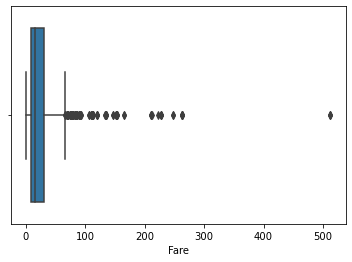

In [8]:
sn.boxplot(df['Fare'])

In [9]:
from datasist.structdata import detect_outliers

In [9]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [10]:
df=df.drop('Embarked',axis=1)

In [12]:
df=pd.get_dummies(df,columns=['Sex'],drop_first=True)

In [13]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,0
888,0,3,NaN,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


In [14]:
for col in df.columns:
    med=df[col].median()
    out=detect_outliers(df,0,[col])
    df.loc[out,col]=med

In [15]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')

In [16]:
df['Age']=imputer.fit_transform(df[['Age']])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [18]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

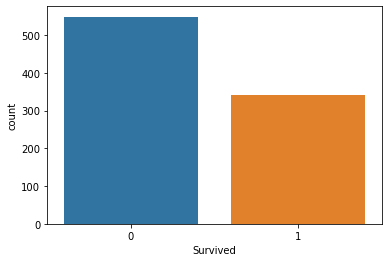

In [19]:
sn.countplot(data=df,x='Survived')

<AxesSubplot:xlabel='Sex', ylabel='count'>

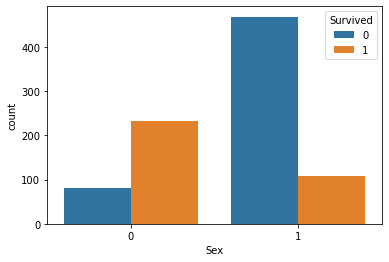

In [20]:
sn.countplot(data=df,x='Sex',hue='Survived')

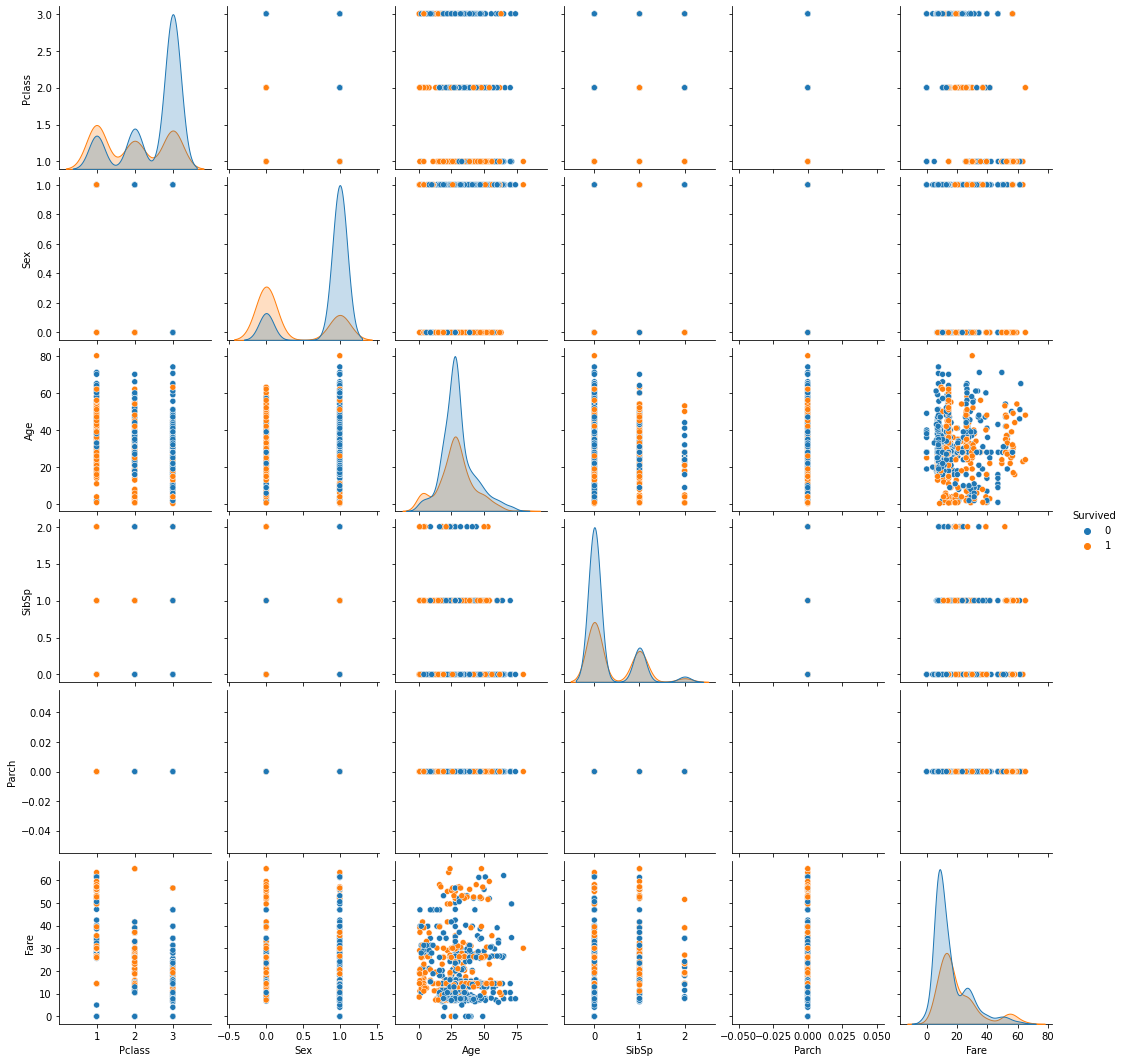

In [21]:
sn.pairplot(df,hue='Survived')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [23]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,14.4542
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
888,0,3,0,28.0,1,0,23.4500
889,1,1,1,26.0,0,0,30.0000


In [24]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [25]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [26]:
x=df.drop('Survived',axis=1)

In [27]:
y=df['Survived']

In [28]:
x,y=sm.fit_resample(x,y)

In [29]:
y.value_counts()

0    549
1    549
Name: Survived, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=11)

In [31]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare
418,2,1,30.0,0,0,13.0000
101,3,1,28.0,0,0,7.8958
272,2,0,41.0,0,0,19.5000
361,2,1,29.0,1,0,27.7208
844,3,1,17.0,0,0,8.6625
...,...,...,...,...,...,...
20,2,1,35.0,0,0,26.0000
98,2,0,34.0,0,0,23.0000
434,1,1,50.0,1,0,55.9000
642,3,0,2.0,0,0,27.9000


In [32]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare
942,1,0,24.000000,0,0,15.081133
229,3,0,28.000000,0,0,25.466700
474,3,0,22.000000,0,0,9.837500
825,3,1,28.000000,0,0,6.950000
632,1,1,32.000000,0,0,30.500000
...,...,...,...,...,...,...
962,2,0,23.739310,1,0,15.486128
1083,2,0,22.145444,1,0,28.854556
386,3,1,1.000000,0,0,46.900000
467,1,1,56.000000,0,0,26.550000


In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [34]:
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report

In [36]:
models = {
    "lr":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "svc":SVC(),
    "dt":DecisionTreeClassifier(),
    "rf":RandomForestClassifier(),
    "xgb":XGBClassifier(),
}

In [37]:
for name,model in models.items():
    print(f'training model:{name} \n.......')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'accuracy score:{accuracy_score(y_test,y_pred)}')

training model:lr 
.......
accuracy score:0.8090909090909091
training model:KNN 
.......
accuracy score:0.8409090909090909
training model:svc 
.......
accuracy score:0.8545454545454545
training model:dt 
.......
accuracy score:0.8409090909090909
training model:rf 
.......
accuracy score:0.8727272727272727
training model:xgb 
.......
[01:51:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy score:0.8454545454545455


In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       110
           1       0.83      0.86      0.85       110

    accuracy                           0.85       220
   macro avg       0.85      0.85      0.85       220
weighted avg       0.85      0.85      0.85       220



In [39]:
model=RandomForestClassifier(random_state=1)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
cc=confusion_matrix(y_pred,y_test)
print(accuracy_score(y_test,y_pred))



0.8863636363636364


<AxesSubplot:>

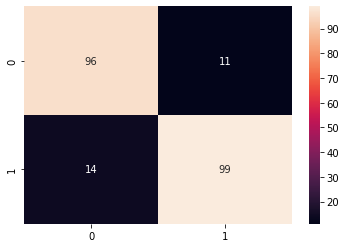

In [40]:
sn.heatmap(cc,annot=True)

# ...................

In [41]:
df2 = pd.read_csv("Social_Network_Ads.csv")
df2.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [43]:
df2.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [44]:
df2.shape

(400, 5)

In [45]:
df2=df2.drop('User ID',axis=1)

In [46]:
df2

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [47]:
df2['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

<AxesSubplot:xlabel='Purchased', ylabel='count'>

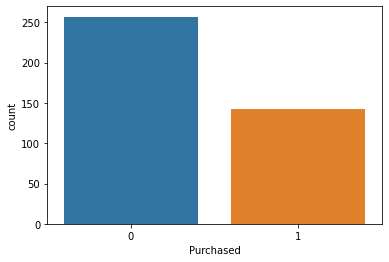

In [48]:
sn.countplot(data = df2 , x='Purchased')

<AxesSubplot:xlabel='Gender', ylabel='count'>

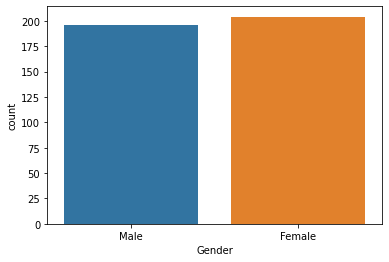

In [49]:
sn.countplot(data = df2 , x='Gender')

<AxesSubplot:xlabel='Purchased', ylabel='count'>

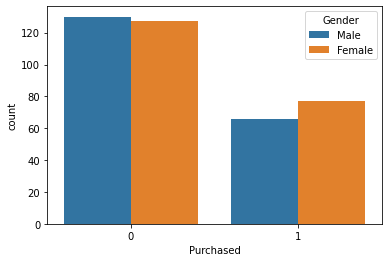

In [50]:
sn.countplot(data = df2 , x='Purchased',hue="Gender")

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

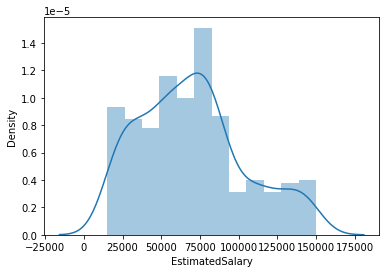

In [51]:
sn.distplot(df2["EstimatedSalary"])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

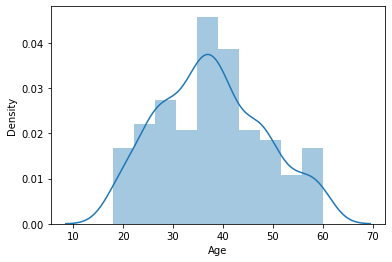

In [52]:
sn.distplot(df2["Age"])

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Age'>

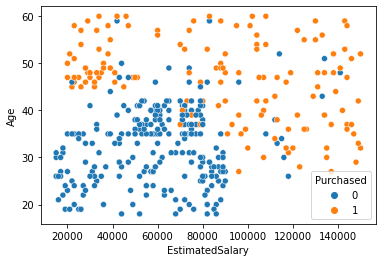

In [55]:
sn.scatterplot(data= df2, x="EstimatedSalary" , y="Age",hue="Purchased")

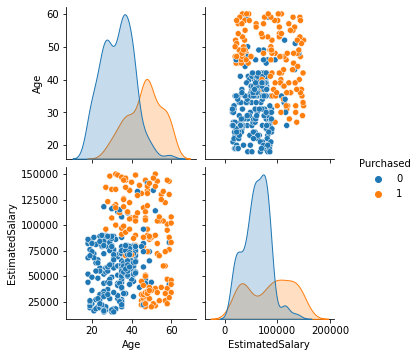

In [56]:
sn.pairplot(data =df2,hue='Purchased')

<AxesSubplot:xlabel='Age', ylabel='Gender'>

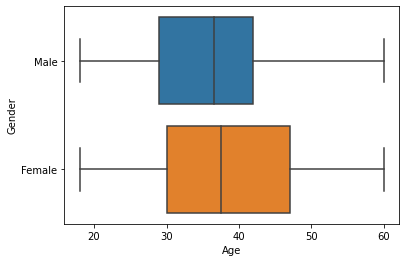

In [57]:
sn.boxplot(data=df2,x='Age',y='Gender')

In [58]:
df2.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [59]:
dict={'Male':1,'Female':0}

In [60]:
df2['Gender']=df2['Gender'].map(dict)

In [61]:
df2

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [62]:
x=df2.drop('Purchased',axis=1)

In [63]:
y=df2['Purchased']

In [65]:
x

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [66]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [67]:
x,y=sm.fit_resample(x,y)

In [68]:
y.value_counts()

0    257
1    257
Name: Purchased, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=12)

In [71]:
x_train

,Gender,Age,EstimatedSalary
297,0,43,112000
235,1,46,79000
196,0,30,79000
167,0,35,71000
95,0,35,44000
...,...,...,...
410,0,51,41424
185,1,31,66000
115,1,40,57000
228,0,40,72000


In [72]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [73]:
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report

In [75]:
models = {
    "lr":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "svc":SVC(),
    "dt":DecisionTreeClassifier(),
    "rf":RandomForestClassifier(),
    "xgb":XGBClassifier(),
}

In [79]:
for name, model in models.items():
    
    print(f'training model {name}')
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(f'accuracy score:{accuracy_score(y_pred,y_test)}\n........')

training model lr
accuracy score:0.8058252427184466
........
training model KNN
accuracy score:0.9029126213592233
........
training model svc
accuracy score:0.9029126213592233
........
training model dt
accuracy score:0.8640776699029126
........
training model rf
accuracy score:0.8932038834951457
........
training model xgb
[02:06:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy score:0.883495145631068
........


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [85]:
model=KNeighborsClassifier(n_neighbors=5)

In [86]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
score=accuracy_score(y_test,y_pred)
score

0.9029126213592233

<AxesSubplot:>

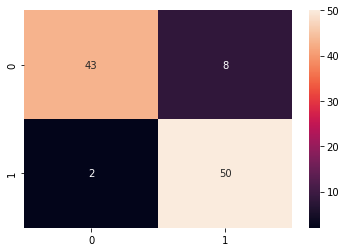

In [87]:
c=confusion_matrix(y_test,y_pred)
sn.heatmap(c,annot=True)